In [1]:
import numpy as np
from neural_net import NeuralNet
import time
%load_ext autoreload
%autoreload 2
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "toy_multiclass_1"
nn = NeuralNet.fromMAT(filename, type="train", lam=0)

In [3]:
gd = nn.constructGradDescentObject()

In [4]:
print nn.lam
print "shape(T) = " + str(np.shape(nn.T))
print "shape(X) = " + str(np.shape(nn.X))
print "shape(W1) = " + str(np.shape(nn.W1))
print "shape(W2) = " + str(np.shape(nn.W2))

0
shape(T) = (3, 300)
shape(X) = (3, 300)
shape(W1) = (30, 3)
shape(W2) = (3, 31)


In [5]:
nn.forwardProp(nn.X)
print "M = " + str(nn.M)
print "shape(a_hidden) = " + str(np.shape(nn.a_hidden))
print "shape(z) = " + str(np.shape(nn.z))
print "shape(a_outputs) = " + str(np.shape(nn.a_outputs))
print "shape(y) = " + str(np.shape(nn.y))

M = 30
shape(a_hidden) = (30, 300)
shape(z) = (31, 300)
shape(a_outputs) = (3, 300)
shape(y) = (3, 300)


In [6]:
w_list = [np.random.random_sample(np.shape(nn.W1)), np.random.random_sample(np.shape(nn.W2))]
nn.W1 = w_list[0]
nn.W2 = w_list[1]
# nn.forwardProp(nn.X, w_list=w_list)
# nn.computeDeltaOutput(np.arange(0,nn.N))
# print np.shape(nn.deltaOutput)
# print np.shape(nn.W2[:,1:].T)
# nn.backPropFull()
[W1_grad, W2_grad] = nn.evalDerivs(w_list)
print "shape(W1_grad) = " + str(np.shape(W1_grad))
print "shape(W2_grad) = " + str(np.shape(W2_grad))
print "shape(deltaHidden) = " + str(np.shape(nn.deltaHidden))
print "shape(deltaOutput) = " + str(np.shape(nn.deltaOutput))
# t = np.outer(nn.deltaHidden[:,0], nn.X[:,0])
# print np.shape(t)
# s = np.outer(nn.deltaOutput[:,0], nn.z[:,0])
# print np.shape(s)
# print W1_grad
# print W2_grad

shape(W1_grad) = (30, 3)
shape(W2_grad) = (3, 31)
shape(deltaHidden) = (30, 300)
shape(deltaOutput) = (3, 300)


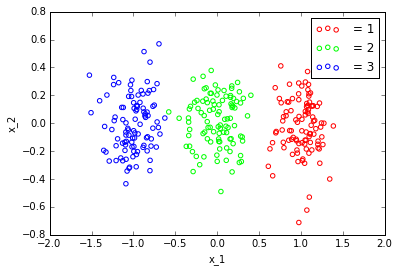

In [7]:
nn.plotData()

function val = 518.310683488
function val after gradient step = 356.570770917
 
--- Minimization Summary --- 
f_min is = 7.06368181877
achieved tolerance = -0.00172902639926
numFunctionCalls = 3000
optimization took 1.78373885155 seconds
---------------------------- 
 


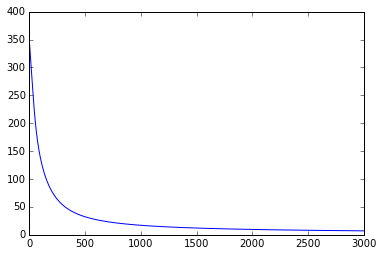

In [8]:
w_initial = [np.random.random_sample(np.shape(nn.W1)), np.random.random_sample(np.shape(nn.W2))]
# w_initial = [nn.W1, nn.W2]
# print w_initial[0]
print "function val = " + str(gd.evalF(w_initial))
gd.stepSize = 0.001
(w_next, f_next) = gd.gradDescentUpdate(w_initial)
print "function val after gradient step = " + str(f_next)
# print nn.evalCost(nn.lam, w_list=w_initial)
w_min, f_min, _, _ = gd.computeMin(w_initial, maxFunctionCalls=3000, storeIterValues=True)
gd.plotIterValues()

[  9.97152848e-01   2.84715151e-03   2.56620886e-12]
(array([0]),)
300


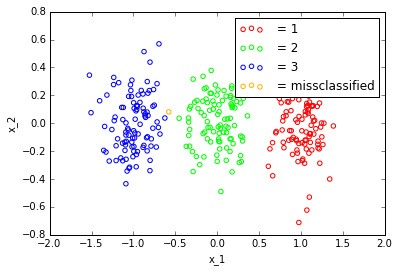

In [9]:
#print w_min
nn.forwardProp(nn.X,w_list=w_min)
print nn.y[:,0]
idx = np.where(nn.y[:,0] == np.max(nn.y[:,0]))
print idx
nn.plotNN(w_min)

## Loss Function

We want to compute the loss function. Using the softmax formulation from Bishop the likelihood is $$\prod_n y_n(x,w)^{t_n}$$. Then we get the log likelihood just by taking logs, then we put a negative sign in front in order to convert it to a minimization problem. Then the loss function is $$-\sum_n t_n \log(y_n(x,w)) + \lambda ||w||_2^2 $$

Activation function is sigmoid

$$ g(z) = \frac{1}{1 + e^{-z}} $$



Each $W^{(1)}$ and $W^{(2)}$ (they call them $w^{(1)}$ and $w^{(2)}$) is a matrix of weights:


$$ W^{(1)} = \begin{bmatrix} w_{1,0} & w_{1,1} & ... & ... & w_{1,D}\\
w_{2,0} &w_{2,1} & ... & ... & w_{2,D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
w_{M,0} &w_{M,1} & ... & ... & w_{M,D}  \end{bmatrix}$$

$$ W^{(2)} = \begin{bmatrix} w_{1,0} & w_{1,1} & ... & ... & w_{1,M}\\
w_{2,0} &w_{2,1} & ... & ... & w_{2,M} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
w_{K,0} &w_{K,1} & ... & ... & w_{K,M}  \end{bmatrix}$$


And we assume $M=N/10$ to start, AKA the amount of hidden units we have in our 1 hidden layer is $M$, and we initialize it to $N/10$, where is $N$ is the number of training examples we have

For our toy dataset, we just have $D$ = 2

The loss function is the NLL and is, given training data and parameters $w$:

$$ l(w) = \sum_{i=1}^N \sum_{k=1}^K \big[ -y_k^{(i)} \log (h_k (x^{(i)}. w)) = (1 - y_k^{(i)}) \log(1-(h_k(x^{(i)},w)) \big] $$

But in order to avoid overfitting, we add regularization terms using the Frobenius norm $||A||_F$ and use as our cost function:

$$ J(w) = l(w) + \lambda(||w^{(1)}||^2_F + ||w^{(2)}||^2_F )$$

### Filling in the holes

The homework description is annoyingly a description of what to do but without enough info to be helpful.

What we also need is the activations:

$$ a_j^{(1)} = \sum_{i=1}^d w_{ji}^{(1)}x_i + w_{j0}^{(1)}$$

And use $g$ to calculate the "feature" for each unit:

$$ z_j = g(a_j) $$


To nicely vectorize our computation of the activations $a$, the first step is to augment our input data with a "1" for each training sample, so that we allow for the $M$ bias weights to be included in the matrix:

$$ x_{aug} = \begin{bmatrix} 1_{N \times 1} &| & x\end{bmatrix} $$

We can now nicely vectorize our computation for the activations:
    
$$ a^{(1)} = W^{(1)} x_{aug} $$

Where we note the dimensionality of each: 
- $x_{aug}$ is a vector of dimension $D+1 \times 1$, where $D$ is the dimensionality of the input data
- $W^{(1)}$ is a matrix of dimension $M \times D+1$, where $M$ is the number of hidden units
- $a^{(1)}$ is a vector of dimension $M \times 1$

Also note that $x_{aug}$ is just for one of the training data samples, $n = 1,...,N$

### Implementing backprop

The notes from class are not super clear, but Bishop 5.3 is.

Here's what we'll do:

- Apply an input vector $x_n$ to the network and forward propagate through the network using 5.48 and 5.49 in order to find the activations of all hidden and output units
- Evaluate the $\delta_k$ for all the output units using 5.54
- Backpropagate the $\delta$'s using 5.56 to obtain $\delta_j$ for each hidden unit in the network
- Use 5.53 to evaluate the required derivatives


5.48 (should be implemented as a matrix multiplication as described above): $$a_j = \sum_i w_{ji}z_i$$

5.49 (is already vectorized as long as $h()$ accepts numpy arrays as input: $$z_j = h(a_j)$$

5.54 (can just be implemented as one subtraction of K-dimensional vectors): $$\delta_k = y_k - t_k$$

5.56 for going from output to hidden layer: $$\delta_j = h'(a_j)\sum_k w_{kj} \delta_k$$

Can be vectorized as:

$$\delta_{prev layer} = h'(a_{prev layer}) \ \  .* \ \ W_{no bias weights}^T \delta_{outputs}  $$

Where .* is element-wise multiply, $\delta_{outputs}$ is a $K$-dimensional vector, $W_{no bias weights}^T$ is $M \times K$

5.53: $$ \frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i $$

Which can be vectorized as on outer product:

$$ \frac{\partial E_n}{\partial W} = z \delta^T$$ 



While implementing as a batch method, we finally sum over all input data samples:


$$ \frac{\partial E}{\partial w_{ji}} = \sum_{n} \frac{\partial E_n}{\partial w_{ji}}$$

### Part 1, Gradient Calculation

Calculate analytical expressions for the gradients with respect to the different matrices of weights.

### Part 2, Implement 2-layer neural network

Use the analytic gradient expressions together with your simple gradient descent procedure to train the network.  Remember to do your implementation in sufficient generality so that you can vary the number of nodes in the hidden layer.

### Part 3, Stochastic gradient descent

Make a small change to your code so that it does *stochastic* gradient descent, doing separate updates based on individual training examples.

### Part 4, Test your Neural Network code

Use your neural network code on the 3-class toy data introduced in the previous question.  Use cross-validation to determine the number of hidden nodes necessary for classification.  Compare the results from batch and from stochastic gradient descent.  (Do NOT need to compare with SVM results)

Actual data


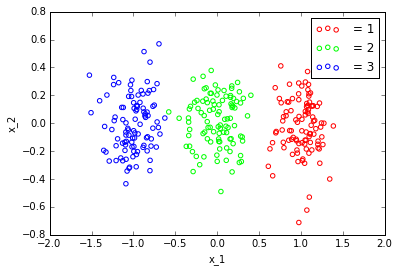

It took 0.175791025162 seconds to plot original data.
using standard gradient descent
 
--- Minimization Summary --- 
f_min is = 79.7494358098
achieved tolerance = -0.0150798258188
numFunctionCalls = 3000
optimization took 1.79283118248 seconds
---------------------------- 
 


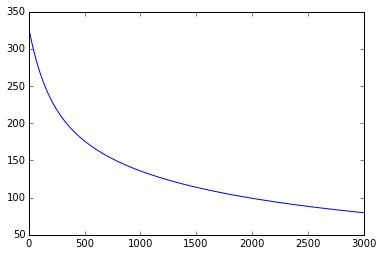

It took 1.91207408905 seconds to train.
Neural net classifier
300


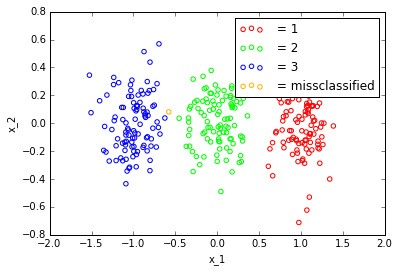

It took 0.189604997635 seconds to plot classification predictions.
300
number of entries missclassified = 1
missclassification rate  = 0.00333333333333


In [10]:
filename = "toy_multiclass_1"
nn = NeuralNet.fromMAT(filename, type="train", lam=0)
nn.train()

### TEST DATASET ###
300


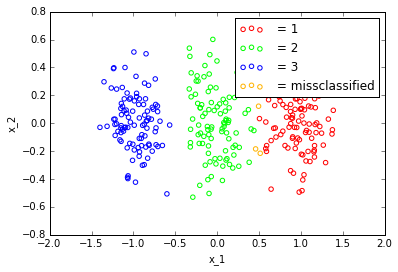

300
number of entries missclassified = 3
missclassification rate  = 0.01
It took 0.191346883774 seconds to test.


In [11]:
nn.test()

### VALIDATION DATASET ###
300


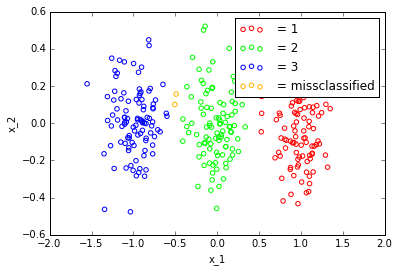

300
number of entries missclassified = 4
missclassification rate  = 0.0133333333333
It took 0.185484886169 seconds to validate.


In [12]:
nn.validate()

In [ ]:
filename = "toy_multiclass_2"
nn = NeuralNet.fromMAT(filename, type="train", lam=0)
nn.train()
nn.test()
nn.validate()

In [ ]:
M = np.linspace(1,20,20)
print M

trainCER = M * 0.0
testCER = M * 0.0
validateCER = M * 0.0

trainTime = M * 0.0

Trials = 20

for i in range(len(M)):
    for j in range(Trials):
        m = M[i]
        filename = "toy_multiclass_2"
        nn = NeuralNet.fromMAT(filename, type="train", lam=0, M=m)

        nn.train(verbose=False)
        trainCER[i] += nn.missclassifiedRate
        trainTime[i] += nn.trainingTime

        nn.test(verbose=False)
        testCER[i] += nn.missclassifiedRate

        nn.validate(verbose=False)
        validateCER[i] += nn.missclassifiedRate
        
trainCER = trainCER/Trials
testCER = testCER/Trials
validateCER = validateCER/Trials

trainTime = trainTime/Trials

In [ ]:
print "Training CER vs. M (number of hidden nodes)"    
plt.plot(M, trainCER, 'red')

print "Test CER vs. M (number of hidden nodes)"    
plt.plot(M, testCER, 'green')

print "Validation CER vs. M (number of hidden nodes)"    
plt.plot(M, validateCER, 'blue')


plt.show()


print "Training time vs. M (number of hidden nodes)"    
plt.plot(M, trainTime, 'black')
plt.show()

## Stochastic Gradient Descent
In this section will repeat the above analysis but for stochastic gradient descent

In [36]:
filename = "toy_multiclass_2"
nn = NeuralNet.fromMAT(filename, type="train", lam=0, M=300)
print nn.M

300


6000.0
Actual data


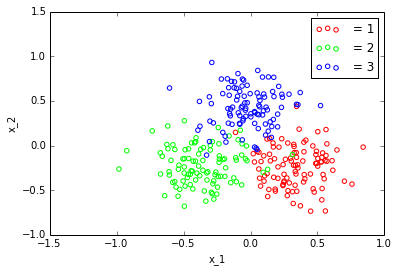

It took 0.131999015808 seconds to plot original data.
using STOCHASTIC gradient descent
 
--- Minimization Summary --- 
f_min is = 185.843065224
achieved tolerance = 0.00461608192725
numIterations = 50000
---------------------------- 
 
It took 6.97773504257 seconds to train.
Neural net classifier
300
self.correctlyClassified shape: (300,)


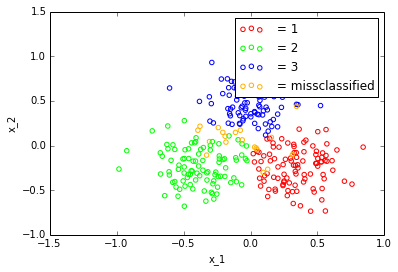

It took 0.124175071716 seconds to plot classification predictions.
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 19
missclassification rate  = 0.0633333333333
### TEST DATASET ###
300
self.correctlyClassified shape: (300,)


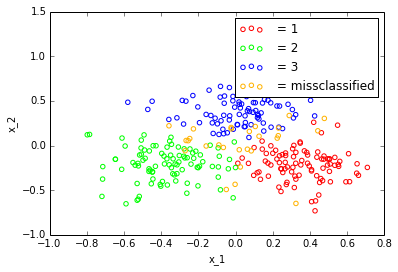

300
self.correctlyClassified shape: (300,)
number of entries missclassified = 27
missclassification rate  = 0.09
It took 0.14130616188 seconds to test.
### VALIDATION DATASET ###
300
self.correctlyClassified shape: (300,)


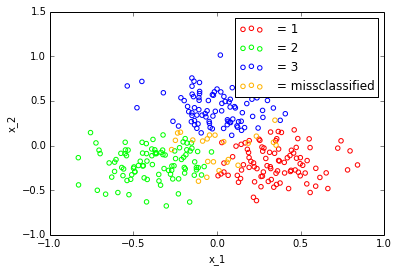

300
self.correctlyClassified shape: (300,)
number of entries missclassified = 23
missclassification rate  = 0.0766666666667
It took 0.126891851425 seconds to validate.


In [37]:
stepSize=nn.N*20.0
print stepSize
nn.train(useSGD=True, stepSize=stepSize, maxFunctionCalls=50000, storeIterValues=False)
nn.test()
nn.validate()

Actual data


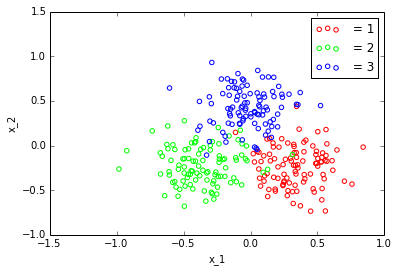

It took 0.114444971085 seconds to plot original data.
using standard gradient descent
 
--- Minimization Summary --- 
f_min is = 54.0095129558
achieved tolerance = -9.99088718956e-05
numFunctionCalls = 2090
optimization took 17.7904810905 seconds
---------------------------- 
 


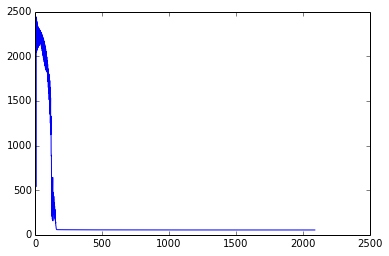

It took 17.8884649277 seconds to train.
Neural net classifier
300
self.correctlyClassified shape: (300,)


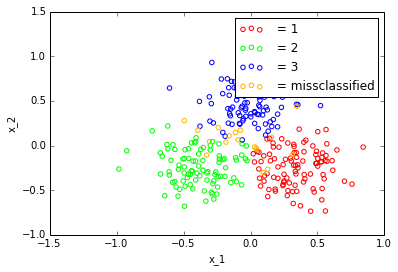

It took 0.124281167984 seconds to plot classification predictions.
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 18
missclassification rate  = 0.06
### TEST DATASET ###
300
self.correctlyClassified shape: (300,)


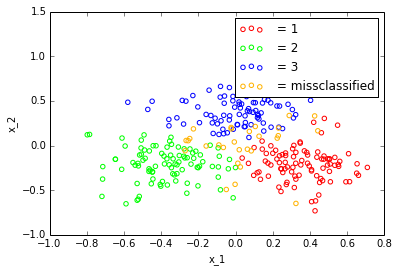

300
self.correctlyClassified shape: (300,)
number of entries missclassified = 28
missclassification rate  = 0.0933333333333
It took 0.141026973724 seconds to test.
### VALIDATION DATASET ###
300
self.correctlyClassified shape: (300,)


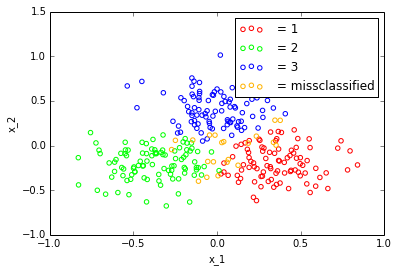

300
self.correctlyClassified shape: (300,)
number of entries missclassified = 21
missclassification rate  = 0.07
It took 0.130525112152 seconds to validate.


In [38]:
nn.train()
nn.test()
nn.validate()

In [47]:
Trials = 5
maxFunctionCalls = 50000
M = np.linspace(10,80, 15)
print M

trainCER = M * 0.0
testCER = M * 0.0
validateCER = M * 0.0

trainTime = M * 0.0


stepSize = 300*20

startTime = time.time()

for i in range(len(M)):
    for j in range(Trials):
        m = np.floor(M[i])
        filename = "toy_multiclass_2"
        nn = NeuralNet.fromMAT(filename, type="train", lam=0, M=m)

        nn.train(verbose=False, useSGD=True, stepSize=stepSize, maxFunctionCalls=maxFunctionCalls, 
                 storeIterValues=False)
        trainCER[i] += nn.missclassifiedRate
        trainTime[i] += nn.trainingTime

        nn.test(verbose=False)
        testCER[i] += nn.missclassifiedRate

        nn.validate(verbose=False)
        validateCER[i] += nn.missclassifiedRate
        
trainCER = trainCER/Trials
testCER = testCER/Trials
validateCER = validateCER/Trials

trainTime = trainTime/Trials

elapsedTime = time.time() - startTime

print ""
print " ----------------------------------- "
print "elapsed time is " + str(elapsedTime)


[ 10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.]
using STOCHASTIC gradient descent
It took 5.21098089218 seconds to train.
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 40
missclassification rate  = 0.133333333333
### TEST DATASET ###
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 56
missclassification rate  = 0.186666666667
It took 0.00311899185181 seconds to test.
### VALIDATION DATASET ###
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 55
missclassification rate  = 0.183333333333
It took 0.0029890537262 seconds to validate.
using STOCHASTIC gradient descent
It took 5.16475009918 seconds to train.
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 91
missclassification rate  = 0.303333333333
### TEST DATASET ###
300
self.correctlyClassified shape: (300,)
number of entries missclassified = 95
missclassification rate  = 0.316666666667
It t

Training CER vs. M (number of hidden nodes)
Test CER vs. M (number of hidden nodes)
Validation CER vs. M (number of hidden nodes)


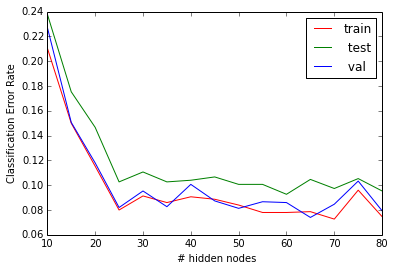

Training time vs. M (number of hidden nodes)


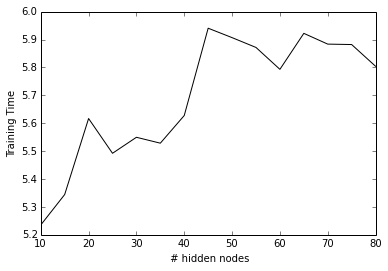

In [49]:
print "Training CER vs. M (number of hidden nodes)"    
plt.plot(M, trainCER, 'red', label = 'train')

print "Test CER vs. M (number of hidden nodes)"    
plt.plot(M, testCER, 'green', label=' test')

print "Validation CER vs. M (number of hidden nodes)"    
plt.plot(M, validateCER, 'blue', label=" val")

plt.xlabel(' # hidden nodes')
plt.ylabel('Classification Error Rate')
plt.legend(loc='best')
plt.show()


print "Training time vs. M (number of hidden nodes)"    
plt.xlabel(' # hidden nodes')
plt.ylabel('Training Time')
plt.plot(M, trainTime, 'black')
plt.show()

In [10]:
print trainCER

[ 0.63733333  0.52066667  0.58466667  0.41966667  0.36966667  0.398
  0.36533333  0.30166667  0.27333333  0.264       0.20533333  0.246       0.24
  0.27233333  0.19033333  0.143       0.17766667  0.148       0.16533333]
